In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#Length of the csv file
len(df)

7043

**DATA PREP**

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#Transpose
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Totalcharges seems to be an object where as it has to be a numeric value
#conversion using pd.to_numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')     #lowercases with _seggregation

string_columns = list(df.dtypes[df.dtypes == 'object'].index) #contains columns where datatype is object

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')       #for looping through all the columns

In [ ]:
df.churn = (df.churn == 'yes').astype(int)
#Converting yes and no to 1 and 0

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk,6713-okomc,7892-pookp,6388-tabgu,...,9767-fflem,0639-tsiqw,8456-qdavc,7750-eyxwz,2569-wgero,6840-resvb,2234-xaduh,4801-jzazl,8361-ltmkd,3186-ajiek
gender,female,male,male,male,female,female,male,female,female,male,...,male,female,male,female,female,male,female,female,male,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
partner,yes,no,no,no,no,no,no,no,yes,no,...,no,no,no,no,no,yes,yes,yes,yes,no
dependents,no,no,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,yes,yes,no,no
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
phoneservice,no,yes,yes,no,yes,yes,yes,no,yes,yes,...,yes,yes,yes,no,yes,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes,no_phone_service,yes,no,...,no,yes,no,no_phone_service,no,yes,yes,no_phone_service,yes,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic,dsl,fiber_optic,dsl,...,fiber_optic,fiber_optic,fiber_optic,dsl,no,dsl,fiber_optic,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no,yes,no,yes,...,no,yes,no,no,no_internet_service,yes,no,yes,no,yes


In [ ]:
from sklearn.model_selection import train_test_split


df_val= validation set- tuning model performance
df_test = test_set - evaluate model performance
df_train = train set - fit and estimate

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
#20% of the data is selected as test size  for df_test

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
#33% of the data is selected as test size  for df_val

In [ ]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [ ]:
del df_train['churn']
del df_val['churn']

**EDA**

In [ ]:
#Checking for null values
df_train_full.isnull().sum()


customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
#churn counts
df_train_full.churn.value_counts()


0    4113
1    1521
Name: churn, dtype: int64

In [ ]:
#average/mean of the churn column
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

DATA TYPES

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
#Unique categorical data counts
df_train_full[categorical].nunique()


gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

FEATURE ANALYSIS

In [ ]:
#GENDER

female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [ ]:
female_mean / global_mean


1.0253955354648652

In [ ]:
male_mean / global_mean


0.9749802969838747

In [ ]:
#PARTNER

partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [ ]:
partner_yes / global_mean


0.7594724924338315

In [ ]:
partner_no / global_mean


1.2216593879412643

In [ ]:
#CHURN BEHAVIOUR BY GENDER GROUP

df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])   #group by mean
df_group['diff'] = df_group['mean'] - global_mean                   #difference b/w mean of churn b/w gender
df_group['risk'] = df_group['mean'] / global_mean                   #risk ratio mean(group)/golbalmean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


**Insight**  
Females tend to churn higher when compared to Males.



In [ ]:
from IPython.display import display


In [ ]:
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [ ]:
#GROUP-WISE COLUMN AGGREGATION WITH REGARDS TO MEAN CHURN
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


**Insight**

From the above data, it can be stated as follows

Gender: **Females** have a slightly higher churn rate and risk compared to males.

SeniorCitizen:** Senior citizens** have a significantly higher churn rate and risk compared to non-senior citizens.

Partner: Customers **without a partner** have a higher churn rate and risk compared to those with a partner.

Dependents: Customers **without dependents** have a higher churn rate and risk compared to those with dependents.

PhoneService: Customers **with phone service** have a slightly higher churn rate and risk compared to those without phone service.

InternetService: Customers **with fiber optic internet** service have a significantly higher churn rate and risk compared to DSL and no internet service.

Other Services: Customers **without additional services** like online security, online backup, device protection, tech support, streaming TV, and streaming movies tend to have a higher churn rate and risk compared to those with these services.

Contract: Customers with** month-to-month contracts** have a significantly higher churn rate and risk compared to one-year and two-year contracts.

PaperlessBilling: Customers **with paperless billing** have a higher churn rate and risk compared to those without paperless billing.

PaymentMethod: Customers **using electronic checks** have the highest churn rate and risk compared to other payment methods.

In [ ]:
from sklearn.metrics import mutual_info_score


In [ ]:
#calculates the mutual information scores between each categorical column
#Statistical dependents to optmize feature variable

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


The highest relavent variables are contract, online security, techsupport, internetservice, online backup.

Whether the lowest are partner, senior citizen,multiplelines,phone service, and gender

In [ ]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')


,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


The highest is the tenure where as the lowest are monthly charges and total charges, and all three numerical data are negatively co-related

In [ ]:
df_train_full.groupby(by='churn')[numerical].mean()


,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


i.e., lesser the tenure, more likely to be churned

**ENCODING**

convert categorical or textual feature data into a numerical representation

In [ ]:
from sklearn.feature_extraction import DictVectorizer


In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [ ]:
train_dict[0]


{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train = dv.transform(train_dict)


In [ ]:
X_train.shape


(3774, 45)

In [ ]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

**MODEL BUILDING**

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
model.predict_proba(X_val)


array([[0.76508784, 0.23491216],
       [0.73113015, 0.26886985],
       [0.68054704, 0.31945296],
       ...,
       [0.94274614, 0.05725386],
       [0.38476895, 0.61523105],
       [0.93872763, 0.06127237]])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]


In [ ]:
y_pred


array([0.23491216, 0.26886985, 0.31945296, ..., 0.05725386, 0.61523105,
       0.06127237])

In [ ]:
churn = y_pred > 0.5


In [ ]:
LR_accuracy= (y_val == churn).mean()


In [ ]:
print("Logistic Regression Accuracy:", LR_accuracy)

Logistic Regression Accuracy: 0.8016129032258065


**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
X_val = dv.transform(val_dict)

In [ ]:
dt_y_pred = dt_model.predict_proba(X_val)[:, 1]

In [ ]:
dt_churn = dt_y_pred > 0.5

In [ ]:
dt_accuracy = (y_val == dt_churn).mean()


In [ ]:
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7231182795698925


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(random_state=1)


In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
X_val = dv.transform(val_dict)


In [ ]:
rf_y_pred = rf_model.predict_proba(X_val)[:, 1]


In [ ]:
rf_churn = rf_y_pred > 0.5


In [ ]:
rf_accuracy = (y_val == rf_churn).mean()


In [ ]:
print("Random Forest Classifier Accuracy:", rf_accuracy)


Random Forest Classifier Accuracy: 0.7784946236559139


**SVM CLASSIFIER**

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm_model = SVC(probability=True, random_state=1)


In [ ]:
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=1)

In [ ]:
X_val = dv.transform(val_dict)


In [ ]:
svm_y_pred = svm_model.predict_proba(X_val)[:, 1]


In [ ]:
svm_churn = svm_y_pred > 0.5


In [ ]:
svm_accuracy = (y_val == svm_churn).mean()


In [ ]:
print("SVM Classifier Accuracy:", svm_accuracy)


SVM Classifier Accuracy: 0.7698924731182796


**Insight**

Among all the four classifier models, Logistic Regression has the higher accuracy. The accuracy can further improved using SMOTEENN since the data is highly imbalanced. 73/27 ratio.

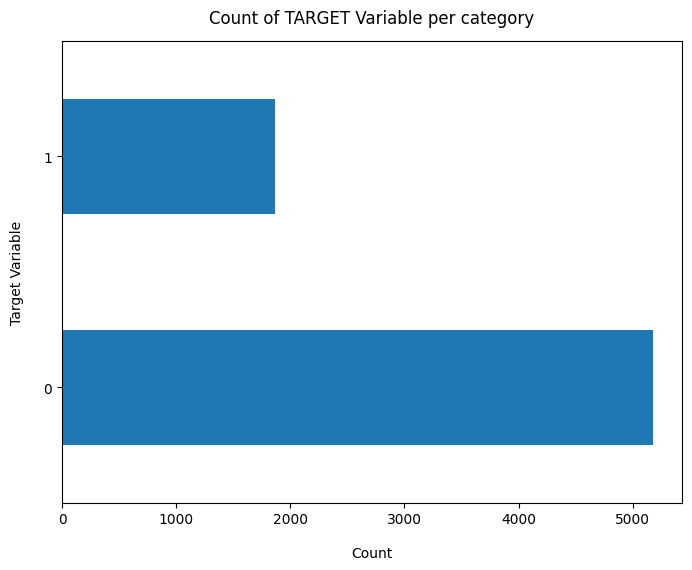

In [ ]:
df['churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
#Ratio in percentage
100*df['churn'].value_counts()/len(df['churn'])

0    73.463013
1    26.536987
Name: churn, dtype: float64

**RESAMPLING**

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
sampler = SMOTEENN(random_state=1)


In [ ]:
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)


Logistic Regression

In [ ]:
lr_model = LogisticRegression(solver='liblinear', random_state=1)
lr_model.fit(X_train_resampled, y_train_resampled)
lr_y_pred = lr_model.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_y_pred)
lr_cm = confusion_matrix(y_val, lr_y_pred)

In [ ]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:")
print(lr_cm)

Logistic Regression Accuracy: 0.7263440860215054
Logistic Regression Confusion Matrix:
[[962 412]
 [ 97 389]]


Decision Tree Classifier

In [ ]:
dts_model = DecisionTreeClassifier(random_state=1)
dts_model.fit(X_train_resampled, y_train_resampled)
dts_y_pred = dts_model.predict(X_val)
dts_accuracy = accuracy_score(y_val, dts_y_pred)
dts_cm = confusion_matrix(y_val, dts_y_pred)


In [ ]:
print("\nDecision Tree Classifier Accuracy:", dts_accuracy)
print("Decision Tree Classifier Confusion Matrix:")
print(dts_cm)


Decision Tree Classifier Accuracy: 0.7370967741935484
Decision Tree Classifier Confusion Matrix:
[[1044  330]
 [ 159  327]]


Random Forest Classifier

In [ ]:
rfs_model = RandomForestClassifier(random_state=1)
rfs_model.fit(X_train_resampled, y_train_resampled)
rfs_y_pred = rfs_model.predict(X_val)
rfs_accuracy = accuracy_score(y_val, rfs_y_pred)
rfs_cm = confusion_matrix(y_val, rfs_y_pred)

In [ ]:
print("\nRandom Forest Classifier Accuracy:", rfs_accuracy)
print("Random Forest Classifier Confusion Matrix:")
print(rfs_cm)


Random Forest Classifier Accuracy: 0.7623655913978494
Random Forest Classifier Confusion Matrix:
[[1073  301]
 [ 141  345]]


SVM Classifier

In [ ]:
svms_model = SVC(probability=True, random_state=1)
svms_model.fit(X_train_resampled, y_train_resampled)
svms_y_pred = svms_model.predict(X_val)
svms_accuracy = accuracy_score(y_val, svms_y_pred)
svms_cm = confusion_matrix(y_val, svms_y_pred)

In [ ]:
print("\nSupport Vector Machine Classifier Accuracy:", svms_accuracy)
print("Support Vector Machine Classifier Confusion Matrix:")
print(svms_cm)


Support Vector Machine Classifier Accuracy: 0.6575268817204301
Support Vector Machine Classifier Confusion Matrix:
[[941 433]
 [204 282]]


By using SMOTEENN, RF classifier performs better than other models with 76%

Hence, using LR from the actual samples and RF from the resampled is selected to build prediction system to compare.

**MODEL INTERPREATION**

In [ ]:
model.intercept_[0]


-0.12198896163042137

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [ ]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [ ]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
model_small.intercept_[0]

-0.6387618613273348

In [ ]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))


{'contract=month-to-month': 0.91,
 'contract=one_year': -0.144,
 'contract=two_year': -1.404,
 'tenure': -0.097,
 'totalcharges': 0.001}

In [ ]:
y_pred_small = model_small.predict_proba(X_small_train)[:, 1]

In [ ]:
print(y_pred_small)

[0.02168748 0.18294155 0.08011575 ... 0.2783125  0.17356043 0.19395679]


Model Interpretation

In [ ]:
rfs_feature_importances = rf_model.feature_importances_

In [ ]:
rf_y_pred = rf_model.predict_proba(X_val)[:, 1]

In [ ]:
print(rf_y_pred)

[0.15 0.21 0.32 ... 0.03 0.64 0.12]


**USING THE MODEL**

**LINEAR REGRESSION**

In [ ]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [ ]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.07332111084949638

In [ ]:
print(list(X_test[0]))


[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [ ]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [ ]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321656556055403

**RF CLASSIFIER**

In [ ]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [ ]:
X_test = dv.transform([customer])
rfs_model.predict_proba(X_test)[0, 1]

0.05

In [ ]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [ ]:
X_test = dv.transform([customer])
rfs_model.predict_proba(X_test)[0, 1]

1.0

Since both calculates similarly, the model (Logistic Regression with 80% accuracy) is selected for model deployment.